# Java: Image Edge Detection Filter
<p align="left">
<img src="./img/businesscard.jpg" width="500px" alt="Business Card" align="left" >
</p>
<br>

[www.rptecnologias.com](http://www.rptecnologias.com)
<br>
guitars.ai@rptecnologias.com


In [1]:
// Imports
import java.io.File;
import java.io.IOException;
import java.awt.image.BufferedImage;
import javax.imageio.ImageIO;
import java.util.Arrays;
import java.util.ArrayList;
import java.util.Collections;

In [2]:
// Load JPG
BufferedImage image = ImageIO.read(new File("./img/guitar.jpg"));

In [3]:
// Get Image Dimensions
int width = image.getWidth();
int height = image.getHeight();

In [4]:
// Initialize r,g,b,a arrays
double r[][] = new double[height][width];
double g[][] = new double[height][width];
double b[][] = new double[height][width];
double a[][] = new double[height][width];

In [5]:
// Define Class for RGBA 2D Arrays
public class RGBA2D
{
    // 2D Arrays
    double r[][] = new double[height][width];
    double g[][] = new double[height][width];
    double b[][] = new double[height][width];
    double a[][] = new double[height][width];   
}

In [6]:
// Define a function to convert RGBA to RGBA 2D Arrays
private static RGBA2D ConvertRGBAtoRGBA2D (BufferedImage image)
{
    int width = image.getWidth();
    int height = image.getHeight();
    
    RGBA2D image2D = new RGBA2D();
    
    for(int y = 0; y < height; y++)
    {
        for(int x = 0; x < width; x++)
        {
            int pixel = image.getRGB(x,y);
            image2D.a[y][x] = (pixel>>24)&0xff;
            image2D.r[y][x] = (pixel>>16)&0xff;
            image2D.g[y][x] = (pixel>>8)&0xff;
            image2D.b[y][x] = pixel&0xff;
        }
    }
    return image2D;
}

In [7]:
// Convert RGBA Image to RGBA 2D Object
RGBA2D image2D = ConvertRGBAtoRGBA2D (image);

In [8]:
// Define Convolution2D
public static double[][] Convolution2D (double f[][], double g[][])
{
    // Initialize output array
    double result[][] = new double[f.length+g.length-1][f[0].length+g[0].length-1];

    //Convolution
    for (int x=0; x < f.length; ++x)
    {
        for(int y=0; y<f[0].length;++y)
            {
                for (int i=0; i<g.length;++i)
                {
                    for (int j=0; j<g[0].length;++j)
                    {
                        result[x+i][y+j]+=f[x][y]*g[i][j];
                    }
                }
                
            }
    
    }
    return result;   
}

In [9]:
// Define Edge Detection Kernel
double[][] kernel = {{-1,-1,-1},{-1,8,-1}, {-1,-1,-1}};

In [10]:
// Convolve 2D Arrays with Kernel and Adjust for Alpha
double[][] convR=Convolution2D(image2D.r,kernel);
double[][] convG=Convolution2D(image2D.g,kernel);
double[][] convB=Convolution2D(image2D.b,kernel);
double new_a[][] = new double[convR.length][convR[0].length];

In [11]:
// Define a function to normalize 2D RGBA Arrays
public static double[][] Normalize2D (double f[][])
{
 
    // Flatten
    ArrayList<Double> flatten = new ArrayList<Double>();
    for(int y = 0; y < f.length; y++)
    {
        for(int x = 0; x < f[0].length; x++)
        {
            flatten.add(f[y][x]);
        }
    }
    
    //Normalize
    double min = Collections.min(flatten); 
    double max = Collections.max(flatten); 
    
    for (int i = 0; i < flatten.size();i++)
    {
        if((max-min) !=0)
        {flatten.set(i,255*(flatten.get(i)-min)/(max-min));}
        else{flatten.set(i,255.0);}
    }
    
    //Back to 2D
    double result[][] = new double[f.length][f[0].length];
    int index=0;
    int n=0;
    for(int i = 0; i < flatten.size(); i++)
    {
        result[index][n] = flatten.get(i);
        n++;
        if(n%f[0].length==0 && n!=0)
            {
                n=0;
                index++;
            }
        
    } 
    return result;
    
}

In [12]:
// Normalize Arrays
double[][] normconvResR=Normalize2D(convR);
double[][] normconvResG=Normalize2D(convG);
double[][] normconvResB=Normalize2D(convB);

In [13]:
// Function to Convert 2D Arrays backto RGBA format
public static BufferedImage arr2DtoRGBA(double r[][],double g[][],double b[][],int a_value)
{
      BufferedImage image = new BufferedImage(r[0].length, r.length,
                BufferedImage.TYPE_3BYTE_BGR);
    
    for (var h=0;h<r.length;h++)
    {
        for(var w=0;w<r[0].length;w++)
        {
            int pixel = (a_value<<24) | ((int)r[h][w]<<16) | ((int)g[h][w]<<8) | (int)b[h][w];
            image.setRGB(w, h, pixel);
       
        }
    }
    return image;
}

In [14]:
// Convert Convolved 2D Arrays to RGBA Format
BufferedImage edgeImage=arr2DtoRGBA(normconvResR,normconvResG,normconvResB,255)

In [15]:
public static BufferedImage ConvertToBW(BufferedImage image)
{
    int width = image.getWidth();
    int height = image.getHeight();
    
    for (var h=0;h<r.length;h++)
    {
        for(var w=0;w<r[0].length;w++)
        {
            int pixel = image.getRGB(w,h);

            int a = (pixel>>24)&0xff;
            int r = (pixel>>16)&0xff;
            r = (r < 128) ? 0 : 255;
            int g = (pixel>>8)&0xff;
            g = (g < 128) ? 0 : 255;
            int b = pixel&0xff;
            b = (b < 128) ? 0 : 255;

            //Grayscale by Average 
            int avg = (r+g+b)/3;

            //set Pixel
            pixel = (a<<24) | (avg<<16) | (avg<<8) | avg;

            image.setRGB(w, h, pixel);
       
        }
    }
    return image;
    
}

In [16]:
BufferedImage edgeImageBW = ConvertToBW(edgeImage);

In [17]:
ImageIO.write(edgeImageBW, "jpg", new File("./img/guitarEdge.jpg"));

true

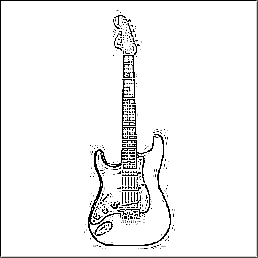

In [18]:
edgeImageBW

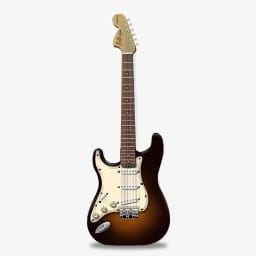

In [19]:
image